# Wine Quality Study

In this project I am analyzing a data set on wine quality taken from the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.html). The data consists of a chemical analysis of many types of wine and each is given a quality score. You can read more about the data [here](http://archive.ics.uci.edu/ml/index.html).

In [1]:
import numpy as np

import pandas as pd
from pandas.tools.plotting import scatter_matrix

import seaborn as sb
sb.set()

%matplotlib inline

## Load the data

In [2]:
red_wine = pd.read_csv('winequality-red.csv',sep=';')

In [3]:
red_wine.describe().T

count       mean        std      min      25%       50%  \
fixed acidity          1599   8.319637   1.741096  4.60000   7.1000   7.90000   
volatile acidity       1599   0.527821   0.179060  0.12000   0.3900   0.52000   
citric acid            1599   0.270976   0.194801  0.00000   0.0900   0.26000   
residual sugar         1599   2.538806   1.409928  0.90000   1.9000   2.20000   
chlorides              1599   0.087467   0.047065  0.01200   0.0700   0.07900   
free sulfur dioxide    1599  15.874922  10.460157  1.00000   7.0000  14.00000   
total sulfur dioxide   1599  46.467792  32.895324  6.00000  22.0000  38.00000   
density                1599   0.996747   0.001887  0.99007   0.9956   0.99675   
pH                     1599   3.311113   0.154386  2.74000   3.2100   3.31000   
sulphates              1599   0.658149   0.169507  0.33000   0.5500   0.62000   
alcohol                1599  10.422983   1.065668  8.40000   9.5000  10.20000   
quality                1599   5.636023   0.807569  3.00000   5.0000   6.00000   

                            75%        max  
fixed acidity          9.200000   15.90000  
volatile acidity       0.640000    1.58000  
citric acid            0.420000    1.00000  
residual sugar         2.600000   15.50000  
chlorides              0.090000    0.61100  
free sulfur dioxide   21.000000   72.00000  
total sulfur dioxide  62.000000  289.00000  
density                0.997835    1.00369  
pH                     3.400000    4.01000  
sulphates              0.730000    2.00000  
alcohol               11.100000   14.90000  
quality                6.000000    8.00000

I will focus on the red wines for this study. Let's see how the red wines range in quality score.

### Scatter plot matrix
To better understand the data, I will use seaborn to make a scatter plot matrix. This is a plot comparing all values in the data set by plotting one value versus the other. It provides a good way to see how the different features are related to eachother.

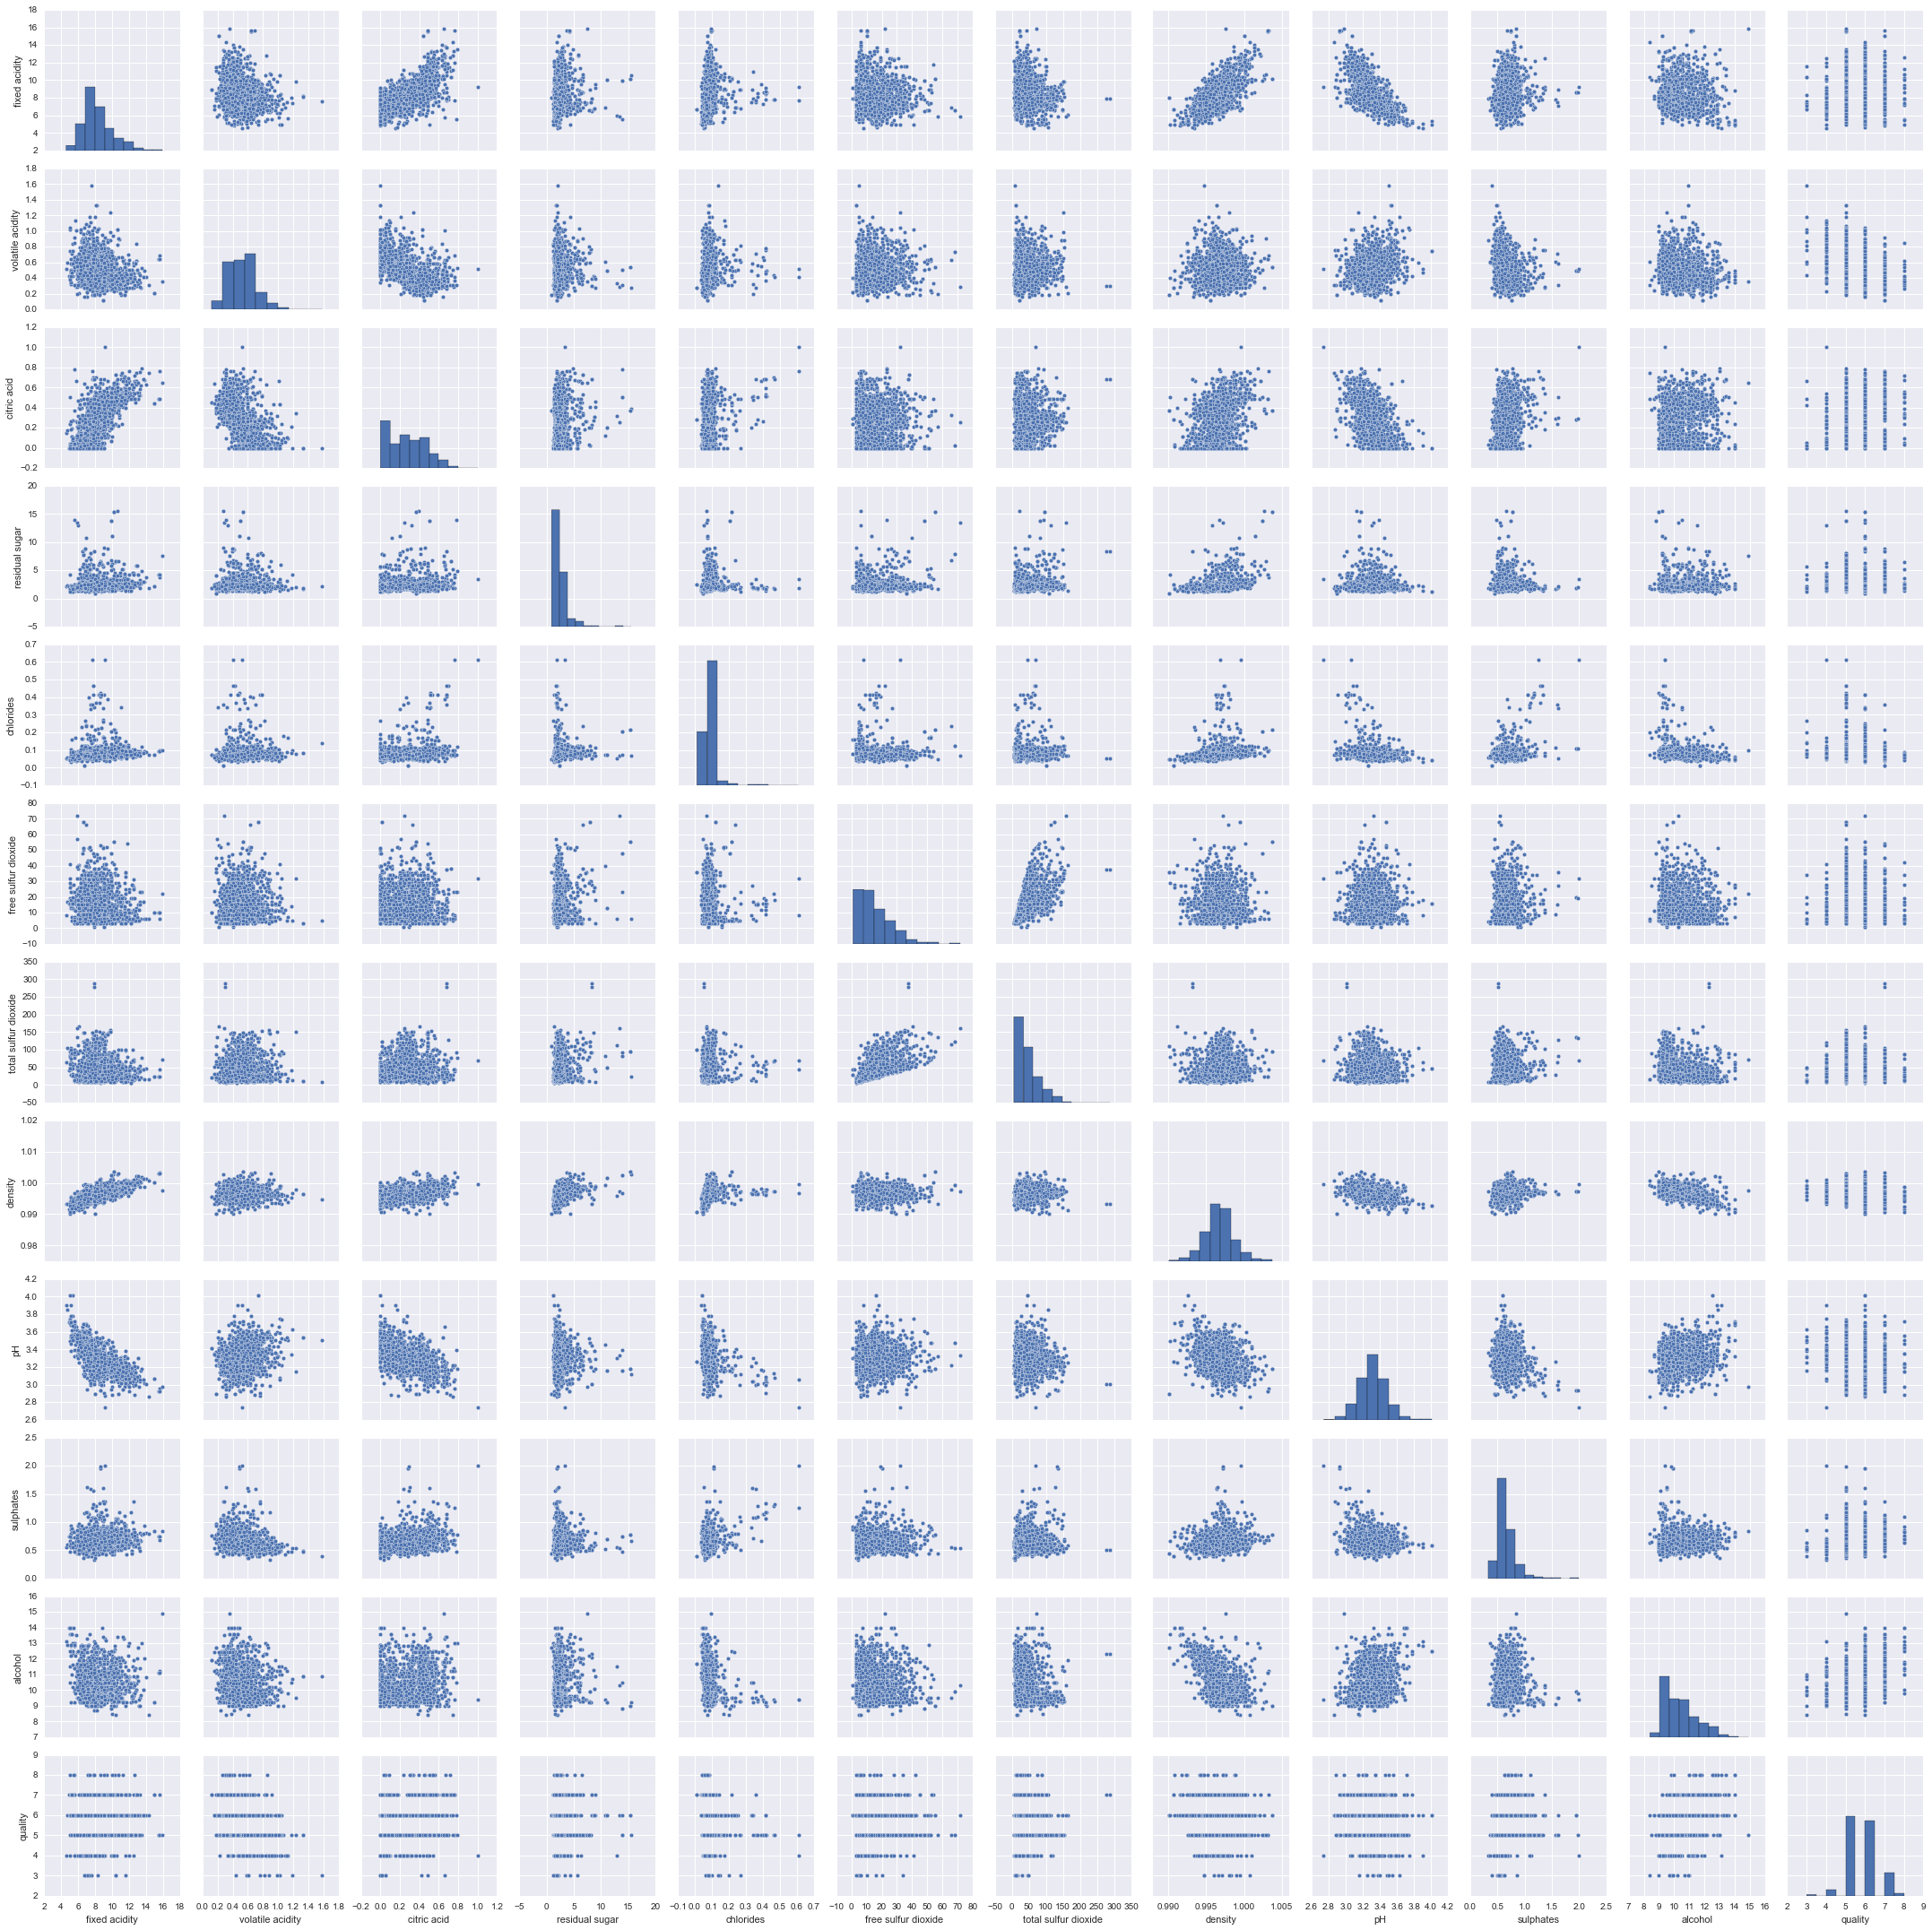

In [4]:
sb.pairplot(red_wine)

### Outliers
Some of the features show outliers. I will define a function to exclude outliers. In this case, I will exclude those points that are more than five standard deviations from the mean.

In [5]:
def outliers(df, threshold, columns):
    for col in columns: 
        mask = df[col] > float(threshold)*df[col].std()+df[col].mean()
        df.loc[mask == True,col] = np.nan
        mean_property = df.loc[:,col].mean()
        df.loc[mask == True,col] = mean_property
    return df

In [6]:
column_list = red_wine.columns.tolist()

In [7]:
red_wine = outliers(red_wine, 5, column_list[0:-1])
red_wine.describe().T

count       mean        std      min      25%       50%  \
fixed acidity          1599   8.319637   1.741096  4.60000   7.1000   7.90000   
volatile acidity       1599   0.527162   0.177113  0.12000   0.3900   0.52000   
citric acid            1599   0.270976   0.194801  0.00000   0.0900   0.26000   
residual sugar         1599   2.463948   1.076293  0.90000   1.9000   2.20000   
chlorides              1599   0.082942   0.025960  0.01200   0.0700   0.07900   
free sulfur dioxide    1599  15.839800  10.365444  1.00000   7.0000  14.00000   
total sulfur dioxide   1599  46.170946  31.806575  6.00000  22.0000  38.00000   
density                1599   0.996747   0.001887  0.99007   0.9956   0.99675   
pH                     1599   3.311113   0.154386  2.74000   3.2100   3.31000   
sulphates              1599   0.652495   0.148975  0.33000   0.5500   0.62000   
alcohol                1599  10.422983   1.065668  8.40000   9.5000  10.20000   
quality                1599   5.636023   0.807569  3.00000   5.0000   6.00000   

                            75%        max  
fixed acidity          9.200000   15.90000  
volatile acidity       0.640000    1.33000  
citric acid            0.420000    1.00000  
residual sugar         2.600000    9.00000  
chlorides              0.089000    0.27000  
free sulfur dioxide   21.000000   68.00000  
total sulfur dioxide  62.000000  165.00000  
density                0.997835    1.00369  
pH                     3.400000    4.01000  
sulphates              0.730000    1.36000  
alcohol               11.100000   14.90000  
quality                6.000000    8.00000

Now let's examine the data again with the outliers removed.

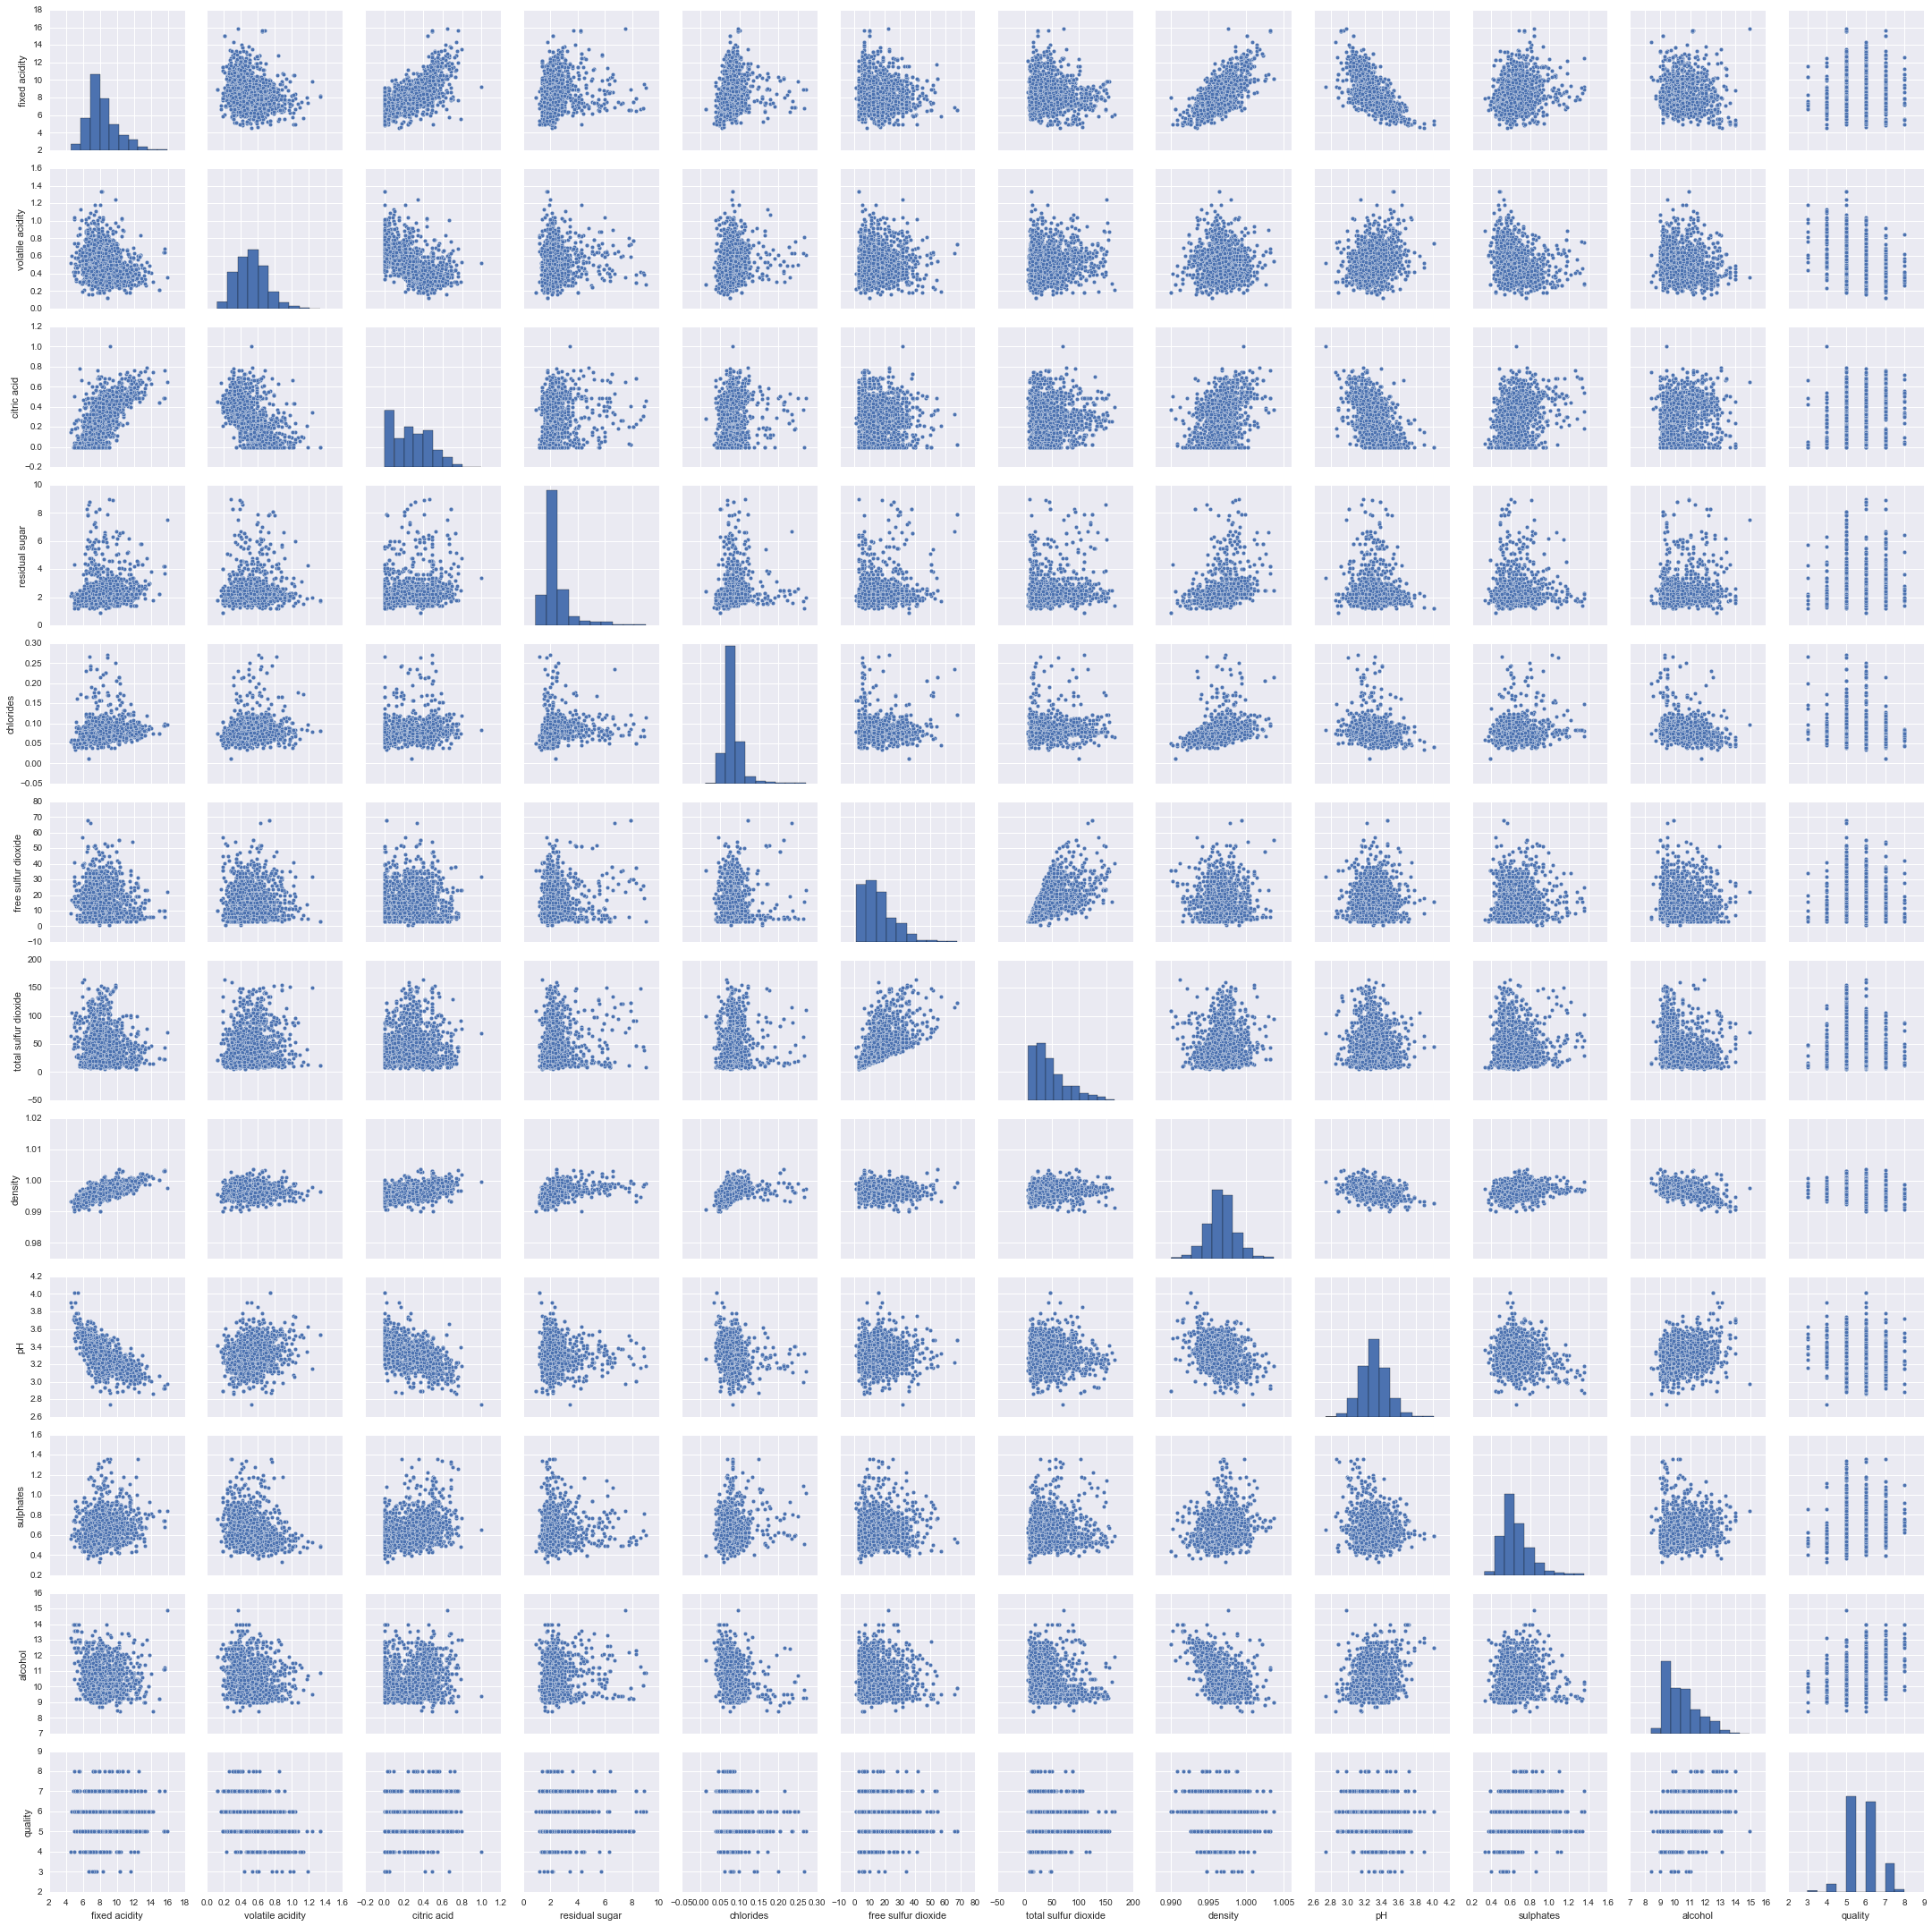

In [8]:
sb.pairplot(red_wine)

## Binning the data by category

In [9]:
print "The range is wine quality is {0}".format(np.sort(red_wine['quality'].unique()))

The range is wine quality is [3 4 5 6 7 8]


I now bin the data into three bins based on their quality, 'Bad', 'Average', and 'Good'.

In [10]:
bins = [3, 5, 6, 8]
red_wine['category'] = pd.cut(red_wine.quality, bins, labels=['Bad', 'Average', 'Good'])

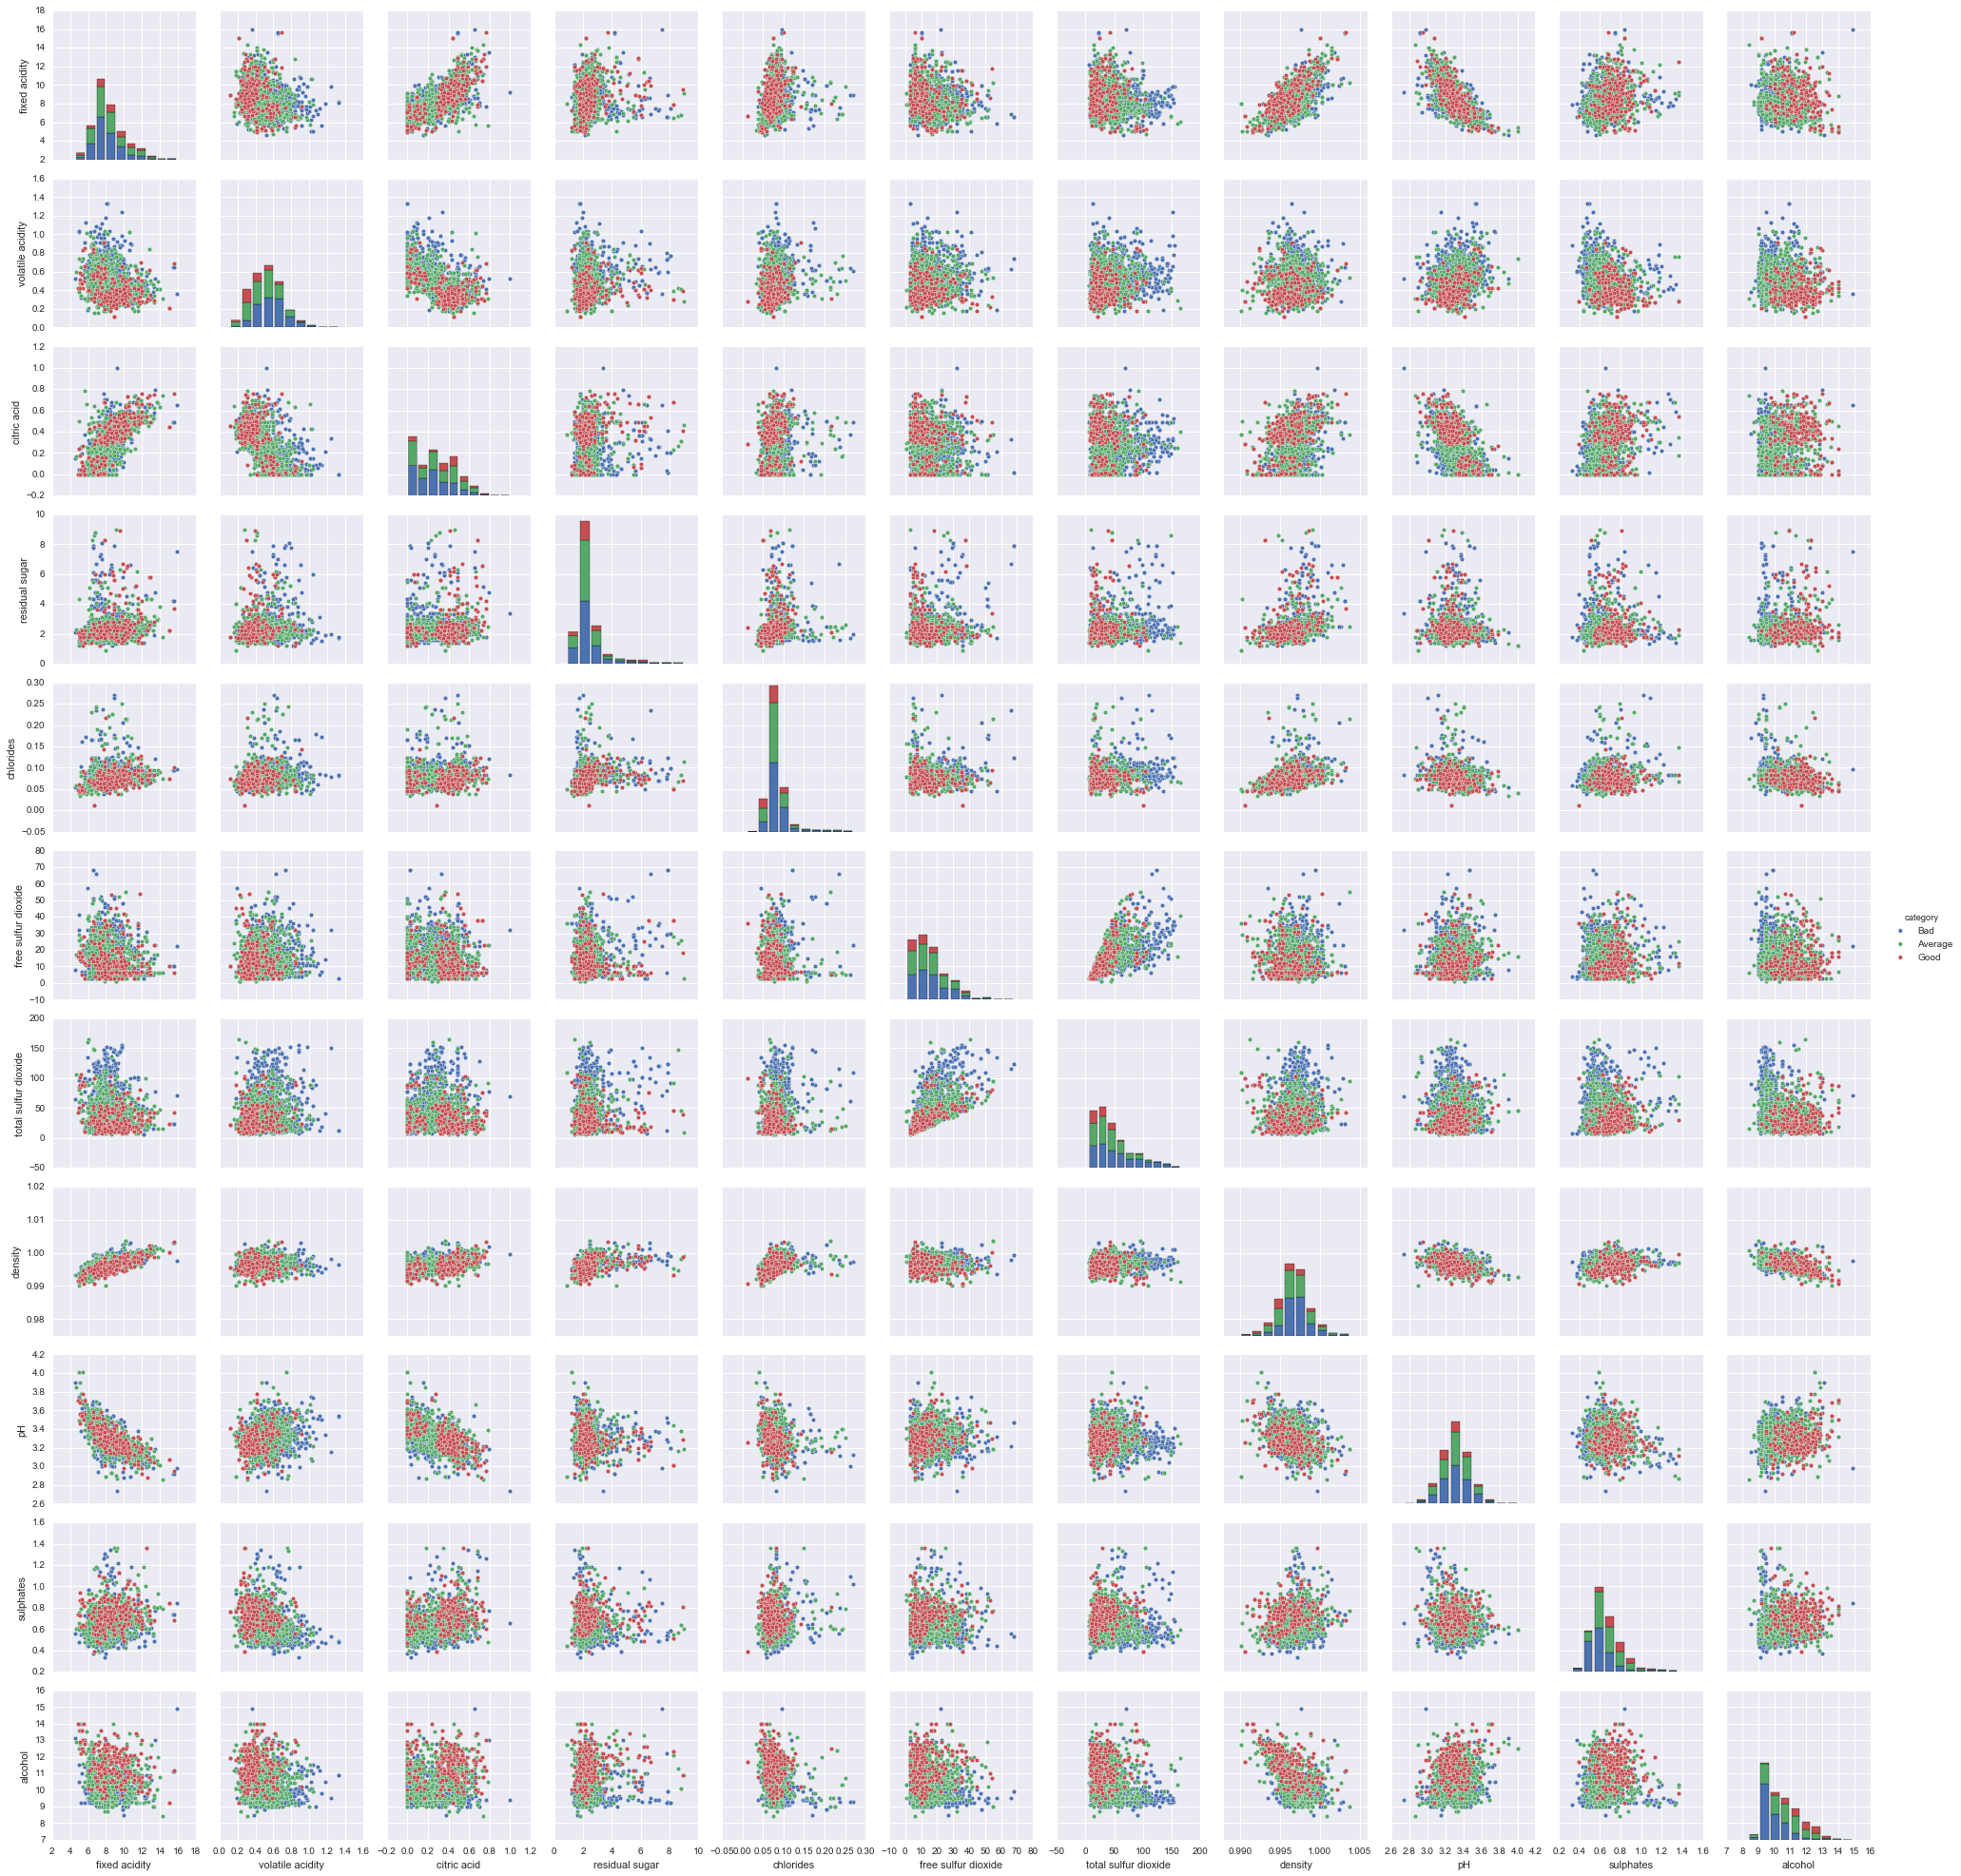

In [11]:
sb.pairplot(red_wine.drop(['quality'],1),hue='category')

In [12]:
red_wine.drop('quality',1).groupby('category').agg(['mean','std']).T

category                         Bad    Average       Good
fixed acidity        mean   8.139237   8.347179   8.847005
                     std    1.570668   1.797849   1.999977
volatile acidity     mean   0.585484   0.497484   0.405530
                     std    0.171900   0.160962   0.144963
citric acid          mean   0.238665   0.273824   0.376498
                     std    0.182344   0.195108   0.194438
residual sugar       mean   2.477937   2.361909   2.708756
                     std    1.104039   0.902309   1.363026
chlorides            mean   0.085496   0.082206   0.074645
                     std    0.024194   0.027374   0.021008
free sulfur dioxide  mean  16.643052  15.623573  13.981567
                     std   10.891157   9.687108  10.234615
total sulfur dioxide mean  55.050409  40.869906  32.702036
                     std   36.756984  25.038250  22.017111
density              mean   0.997063   0.996615   0.996030
                     std    0.001593   0.002000   0.002201
pH                   mean   3.310477   3.318072   3.288802
                     std    0.154189   0.153995   0.154478
sulphates            mean   0.611720   0.669761   0.743456
                     std    0.149053   0.136632   0.134038
alcohol              mean   9.926090  10.629519  11.518049
                     std    0.757750   1.049639   0.998153

Notice that there is quite a bit of overlap between the average values and the bad values. I will throw out the average values and only perform a classification between the 'Good' wine and the 'Bad' wine.

In [13]:
red_wine_newcats = red_wine[red_wine['category'].isin(['Bad','Good'])].copy()

In [14]:
np.sort(red_wine_newcats['quality'].unique())

array([4, 5, 7, 8])

In [15]:
bins = [3, 5, 8]
red_wine_newcats['category'] = pd.cut(red_wine_newcats.quality, bins, labels=['Bad', 'Good'])

In [16]:
red_wine.shape, red_wine_newcats.shape

((1599, 13), (951, 13))

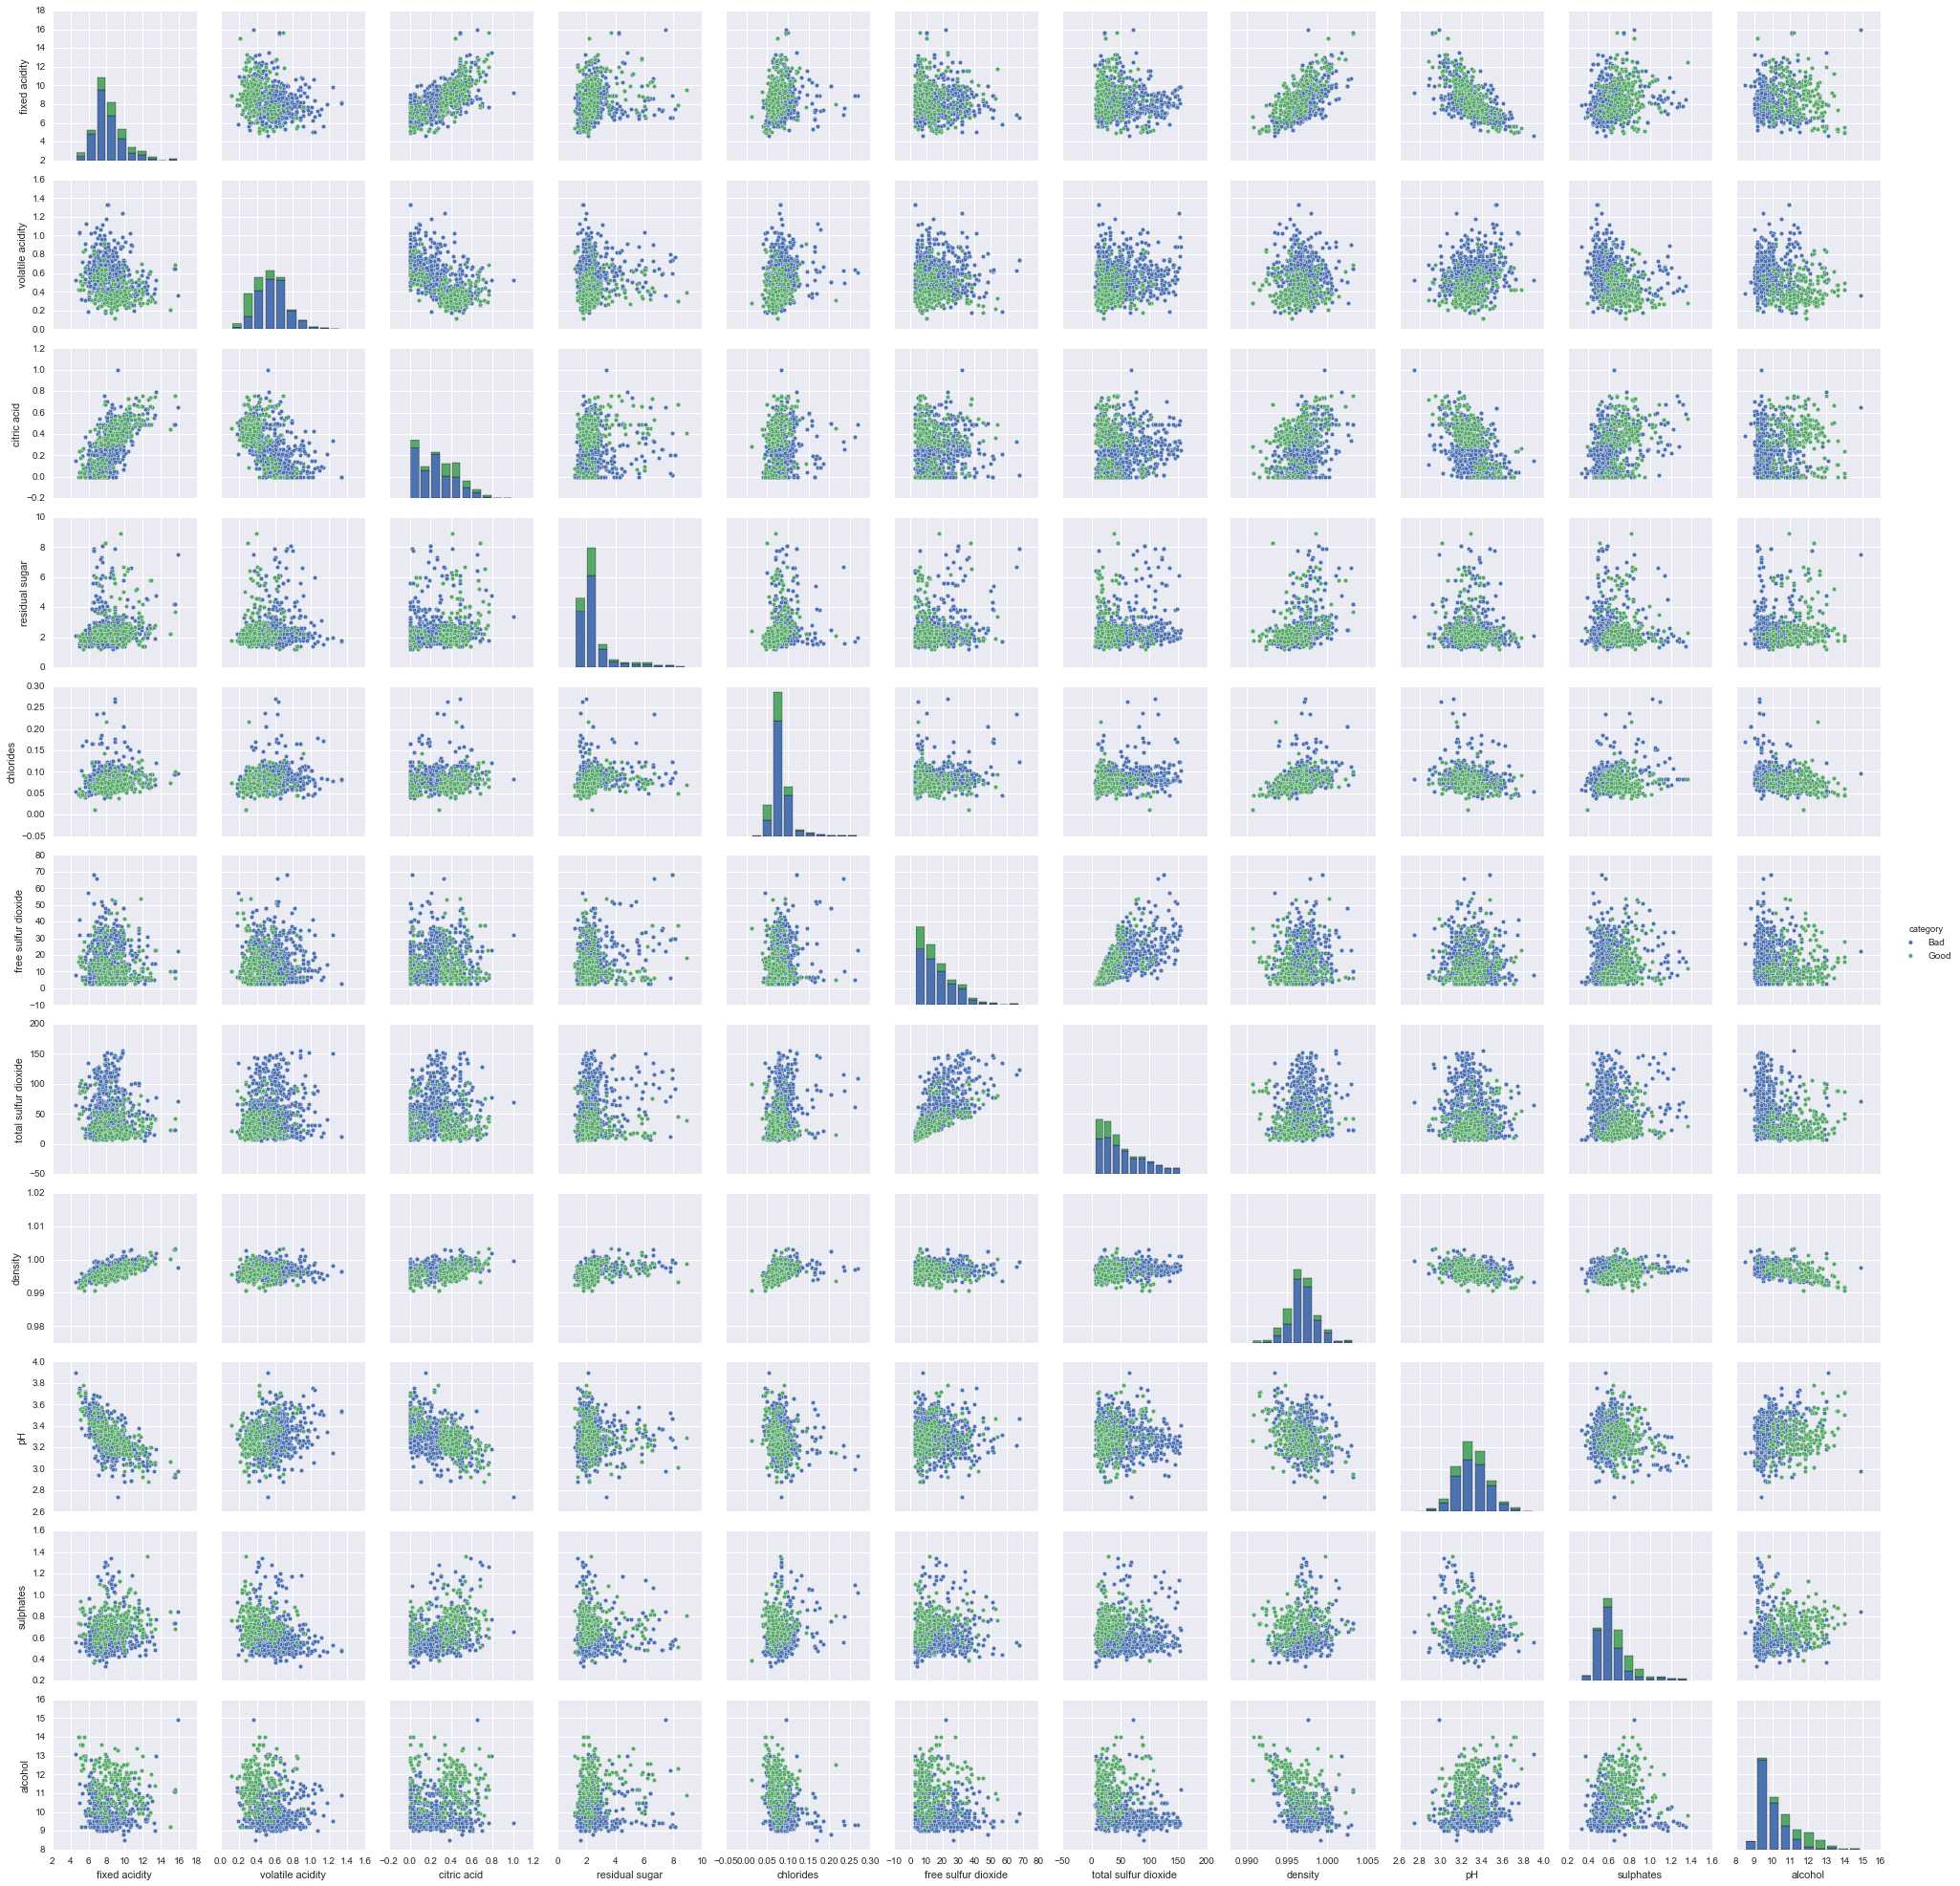

In [17]:
sb.pairplot(red_wine_newcats.drop(['quality'],1),hue='category')

In [18]:
red_wine_newcats.drop('quality',1).groupby('category').agg(['mean','std']).T

category                         Bad       Good
fixed acidity        mean   8.139237   8.847005
                     std    1.570668   1.999977
volatile acidity     mean   0.585484   0.405530
                     std    0.171900   0.144963
citric acid          mean   0.238665   0.376498
                     std    0.182344   0.194438
residual sugar       mean   2.477937   2.708756
                     std    1.104039   1.363026
chlorides            mean   0.085496   0.074645
                     std    0.024194   0.021008
free sulfur dioxide  mean  16.643052  13.981567
                     std   10.891157  10.234615
total sulfur dioxide mean  55.050409  32.702036
                     std   36.756984  22.017111
density              mean   0.997063   0.996030
                     std    0.001593   0.002201
pH                   mean   3.310477   3.288802
                     std    0.154189   0.154478
sulphates            mean   0.611720   0.743456
                     std    0.149053   0.134038
alcohol              mean   9.926090  11.518049
                     std    0.757750   0.998153

It looks like total sulfar dioxide is a good indicator of wine quality. I will use this to classify whether the wine is a 'Good' wine or a 'Bad' wine.

## Using skflow

In [19]:
import sklearn
from sklearn import metrics, preprocessing
from sklearn.cross_validation import train_test_split

import skflow

Before using TensorFlow, I will use skflow to make the model.

### Separate data into labels and features
Here I separate the data into 'labels' (y values) and 'feature' (X values) and divide them into training and test sets using train_test_split() from scikit-learn.

In [20]:
y_red_wine = red_wine_newcats[['category']].get_values()

In [21]:
X_red_wine = red_wine_newcats['total sulfur dioxide'].get_values()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_red_wine, test_size=0.2, random_state=42)

The y values are string categories ('Good' and 'Bad') and so need to be converted to integers so that skflow will understand the categories. This is done using fit_transform() from the CategoricalProcessor class in skflow.

In [23]:
cat_processor = skflow.preprocessing.CategoricalProcessor()
y_train_cat = np.array(list(cat_processor.fit_transform(y_train)))
y_test_cat = np.array(list(cat_processor.transform(y_test)))

In [24]:
n_classes = len(cat_processor.vocabularies_[0])

In [25]:
print("There are {0} different classes.").format(n_classes)

There are 3 different classes.


In [26]:
# Define the model
def categorical_model(X, y):
    return skflow.models.logistic_regression(X, y)

In [27]:
# Train the model
classifier = skflow.TensorFlowEstimator(model_fn=categorical_model,
    n_classes=3, learning_rate=0.01)

In [28]:
classifier.fit(X_train, y_train_cat)

Step #1, avg. loss: 99.96664
Step #21, avg. loss: 68.15295
Step #41, epoch #1, avg. loss: 11.87642
Step #61, epoch #2, avg. loss: 1.69902
Step #81, epoch #3, avg. loss: 0.73753
Step #101, epoch #4, avg. loss: 0.77219
Step #121, epoch #5, avg. loss: 0.72735
Step #141, epoch #5, avg. loss: 0.73165
Step #161, epoch #6, avg. loss: 0.67294
Step #181, epoch #7, avg. loss: 0.67628


TensorFlowEstimator(batch_size=32, class_weight=None, continue_training=False,
          early_stopping_rounds=None, keep_checkpoint_every_n_hours=10000,
          learning_rate=0.01, max_to_keep=5,
          model_fn=<function categorical_model at 0x1549d4f50>,
          n_classes=3, num_cores=4, optimizer='SGD', steps=200,
          tf_master='', tf_random_seed=42, verbose=1)

In [29]:
print("Accuracy: {0}".format(metrics.accuracy_score(classifier.predict(X_test), y_test_cat)))

Accuracy: 0.764397905759


Not bad for a start! Now the model needs to be revised.

### Categorical Model with Two Features

Now I include two features, 'total sulfur dioxide' and 'density', to see if this improves the model.

In [30]:
X_red_wine = red_wine_newcats[['total sulfur dioxide','density']].get_values()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_red_wine, test_size=0.2, 
                                                    random_state=42)

In [32]:
cat_processor = skflow.preprocessing.CategoricalProcessor()
y_train_cat = np.array(list(cat_processor.fit_transform(y_train)))
y_test_cat = np.array(list(cat_processor.transform(y_test)))

In [33]:
n_classes = len(cat_processor.vocabularies_[0])

In [34]:
print("There are {0} different classes.").format(n_classes)

There are 3 different classes.


In [35]:
# Define the model
def categorical_model(X, y):
    return skflow.models.logistic_regression(X, y)

In [36]:
# Train the model
classifier = skflow.TensorFlowEstimator(model_fn=categorical_model,
    n_classes=3, learning_rate=0.01)

In [37]:
classifier.fit(X_train, y_train_cat)

Step #1, avg. loss: 69.17908
Step #21, avg. loss: 36.44724
Step #41, epoch #1, avg. loss: 2.69154
Step #61, epoch #2, avg. loss: 0.91624
Step #81, epoch #3, avg. loss: 0.81134
Step #101, epoch #4, avg. loss: 0.81615
Step #121, epoch #5, avg. loss: 0.75228
Step #141, epoch #5, avg. loss: 0.70417
Step #161, epoch #6, avg. loss: 0.65185
Step #181, epoch #7, avg. loss: 0.89500


TensorFlowEstimator(batch_size=32, class_weight=None, continue_training=False,
          early_stopping_rounds=None, keep_checkpoint_every_n_hours=10000,
          learning_rate=0.01, max_to_keep=5,
          model_fn=<function categorical_model at 0x158f759b0>,
          n_classes=3, num_cores=4, optimizer='SGD', steps=200,
          tf_master='', tf_random_seed=42, verbose=1)

In [38]:
print("Accuracy: {0}".format(metrics.accuracy_score(classifier.predict(X_test), y_test_cat)))

Accuracy: 0.612565445026


### Catagorical Model Using Ten Features
I now add additional features. In this case, I am including all features except fixed acidity, which show some colinearity with pH and density.

In [39]:
red_wine_newcats.iloc[:,1:-2].head()

volatile acidity  citric acid  residual sugar  chlorides  \
0              0.70         0.00             1.9      0.076   
1              0.88         0.00             2.6      0.098   
2              0.76         0.04             2.3      0.092   
4              0.70         0.00             1.9      0.076   
5              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
4                   11                    34   0.9978  3.51       0.56   
5                   13                    40   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
4      9.4  
5      9.4

In [40]:
X_red_wine = red_wine_newcats.iloc[:,1:-2].get_values()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_red_wine, test_size=0.2, 
                                                    random_state=42)

In [42]:
cat_processor = skflow.preprocessing.CategoricalProcessor()
y_train_cat = np.array(list(cat_processor.fit_transform(y_train)))
y_test_cat = np.array(list(cat_processor.transform(y_test)))

In [43]:
n_classes = len(cat_processor.vocabularies_[0])

In [44]:
print("There are {0} different classes.").format(n_classes)

There are 3 different classes.


In [45]:
# Define the model
def categorical_model(X, y):
    return skflow.models.logistic_regression(X, y)

In [46]:
# Train the model
classifier = skflow.TensorFlowEstimator(model_fn=categorical_model,
    n_classes=3, learning_rate=0.005)

In [47]:
classifier.fit(X_train, y_train_cat)

Step #1, avg. loss: 1.26004
Step #21, avg. loss: 0.83428
Step #41, epoch #1, avg. loss: 0.63736
Step #61, epoch #2, avg. loss: 0.67408
Step #81, epoch #3, avg. loss: 0.53979
Step #101, epoch #4, avg. loss: 0.52675
Step #121, epoch #5, avg. loss: 0.53324
Step #141, epoch #5, avg. loss: 0.50395
Step #161, epoch #6, avg. loss: 0.52835
Step #181, epoch #7, avg. loss: 0.54818


TensorFlowEstimator(batch_size=32, class_weight=None, continue_training=False,
          early_stopping_rounds=None, keep_checkpoint_every_n_hours=10000,
          learning_rate=0.005, max_to_keep=5,
          model_fn=<function categorical_model at 0x14730dc80>,
          n_classes=3, num_cores=4, optimizer='SGD', steps=200,
          tf_master='', tf_random_seed=42, verbose=1)

In [48]:
print("Accuracy: {0}".format(metrics.accuracy_score(classifier.predict(X_test), y_test_cat)))

Accuracy: 0.795811518325


**An improved accuracy!**

## Tensor Flow

In [49]:
import tensorflow as tf

Convert y-labels from strings to integers. Bad = 1, Good = 0.

In [50]:
y_red_wine_raveled = y_red_wine.ravel()
y_red_wine_integers = [y.replace('Bad', '1') for y in y_red_wine_raveled]
y_red_wine_integers = [y.replace('Good', '0') for y in y_red_wine_integers]
y_red_wine_integers = [np.int(y) for y in y_red_wine_integers]

Convert y-labels to one-hot vectors.

In [51]:
def dense_to_one_hot(labels_dense, num_classes=2):
  # Convert class labels from scalars to one-hot vectors
  num_labels = len(labels_dense)
  index_offset = np.arange(num_labels) * num_classes
  labels_one_hot = np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense] = 1
  return labels_one_hot

In [52]:
y_one_hot = dense_to_one_hot(y_red_wine_integers, num_classes=2)

Divide the data into training and test sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_one_hot, test_size=0.2, random_state=42)

Define modeling parameters

In [120]:
learning_rate = 0.005
batch_size = 126

In [121]:
X = tf.placeholder("float",[None,10])
Y = tf.placeholder("float",[None,2])

Set model weights and biases.

In [122]:
W = tf.Variable(tf.zeros([10, 2]))
b = tf.Variable(tf.zeros([2]))

Construct the model. We will use softmax regression since this is good for catagorial data.

In [123]:
model = tf.nn.softmax(tf.matmul(X, W) + b)

Minimize the error using cross entropy.

In [124]:
cost = -tf.reduce_mean(Y*tf.log(model))

Define the optimizer. We will use gradient descent.

In [125]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

Start a TensorFlow session and initialize all variables.

In [126]:
sess = tf.Session()
init = tf.initialize_all_variables()
sess.run(init)

In [127]:
for i in range(100):
    average_cost = 0
    number_of_batches = int(len(X_train) / batch_size)
    for start, end in zip(range(0, len(X_train), batch_size), range(batch_size, len(X_train), batch_size)):
        sess.run(optimizer, feed_dict={X: X_train[start:end], Y: y_train[start:end]})
        # Compute average loss
        average_cost += sess.run(cost, feed_dict={X: X_train[start:end], Y: y_train[start:end]}) / number_of_batches
    print "Epoch:", '%04d' % (i+1), "cost=", "{:.9f}".format(average_cost)
    
print 'Finished optimization!'

Epoch: 0001 cost= 0.268023300
Epoch: 0002 cost= 0.243357231
Epoch: 0003 cost= 0.241053467
Epoch: 0004 cost= 0.239559305
Epoch: 0005 cost= 0.238535017
Epoch: 0006 cost= 0.237802530
Epoch: 0007 cost= 0.237258452
Epoch: 0008 cost= 0.236839890
Epoch: 0009 cost= 0.236506825
Epoch: 0010 cost= 0.236233046
Epoch: 0011 cost= 0.236001134
Epoch: 0012 cost= 0.235799074
Epoch: 0013 cost= 0.235618522
Epoch: 0014 cost= 0.235453608
Epoch: 0015 cost= 0.235300203
Epoch: 0016 cost= 0.235155294
Epoch: 0017 cost= 0.235016706
Epoch: 0018 cost= 0.234882923
Epoch: 0019 cost= 0.234752697
Epoch: 0020 cost= 0.234625238
Epoch: 0021 cost= 0.234499892
Epoch: 0022 cost= 0.234376207
Epoch: 0023 cost= 0.234253873
Epoch: 0024 cost= 0.234132508
Epoch: 0025 cost= 0.234012025
Epoch: 0026 cost= 0.233892240
Epoch: 0027 cost= 0.233773025
Epoch: 0028 cost= 0.233654253
Epoch: 0029 cost= 0.233535913
Epoch: 0030 cost= 0.233417948
Epoch: 0031 cost= 0.233300296
Epoch: 0032 cost= 0.233182952
Epoch: 0033 cost= 0.233065893
Epoch: 003

Test the model:

In [128]:
correct_prediction = tf.equal(tf.argmax(model, 1), tf.argmax(y_test, 1))

Calculate the accuracy:

In [129]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print "Accuracy:", sess.run(accuracy, feed_dict={X: X_test, Y: y_test})

Accuracy: 0.764398




*Reference: Lichman, M. (2013). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.*